# Image Classification - CIFAR-10
* Final Result:
    1. Best Model: DenseNet, It is a strong model with potential overfitting because it shows a significant reduction in loss with an improving accuracy trend.
    2. Worst Model: MobileNet, It is due to incompatible hyperparameters.




Dataset Link: https://www.cs.toronto.edu/~kriz/cifar.html  
W&B Link: https://api.wandb.ai/links/raj-hr9934-vit-bhopal/wq6t8b51


* CNN Architecture-
      1. Vanilla Architecture
      2. MobileNet Architecture
      3. DenseNet Architecture
      4. ResNet Architecture
* Optimizer-
      1. Adam
      2. SGD
* Activation fun-
      1. Relu
      2. Softmax

* Learning rate-
      1. 0.001
      2. 0.005
      3. 0.0001
* Evaluation Graph- Training & Validation Loss vs Accuracy Graph


# Connect training metrics with Weight & Biases

In [1]:
! pip install wandb


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import wandb

W&B API Setup

In [3]:
wandb.login(key="43fdcc829bb1027c07414811401349e049e30152") # API Key

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\himan\_netrc
wandb: Currently logged in as: raj-hr9934 (raj-hr9934-vit-bhopal) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# Data Preperation & Normalization

Check Data Shape-- Normalization

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0 #Normalize range[0,1]

In [6]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Data Matrix

In [7]:
print(x_test)


[[[[0.61960784 0.43921569 0.19215686]
   [0.62352941 0.43529412 0.18431373]
   [0.64705882 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254902 0.14117647]
   [0.49411765 0.35686275 0.14117647]
   [0.45490196 0.33333333 0.12941176]]

  [[0.59607843 0.43921569 0.2       ]
   [0.59215686 0.43137255 0.15686275]
   [0.62352941 0.44705882 0.17647059]
   ...
   [0.53333333 0.37254902 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509804 0.13333333]]

  [[0.59215686 0.43137255 0.18431373]
   [0.59215686 0.42745098 0.12941176]
   [0.61960784 0.43529412 0.14117647]
   ...
   [0.54509804 0.38431373 0.13333333]
   [0.50980392 0.37254902 0.13333333]
   [0.47058824 0.34901961 0.12941176]]

  ...

  [[0.26666667 0.48627451 0.69411765]
   [0.16470588 0.39215686 0.58039216]
   [0.12156863 0.34509804 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254902]
   [0.05098039 0.25098039 0.42352941]
   [0.15686275 0.33333333 0.49803922]]

  [[0.23921569 0.45490196 0.65882353]
   [0.1

In [8]:
print(y_test)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
print(f"Train set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")

Train set: (50000, 32, 32, 3), Labels: (50000, 10)
Test set: (10000, 32, 32, 3), Labels: (10000, 10)


# Data Visualization

In [10]:
import matplotlib.pyplot as plt
import numpy as np

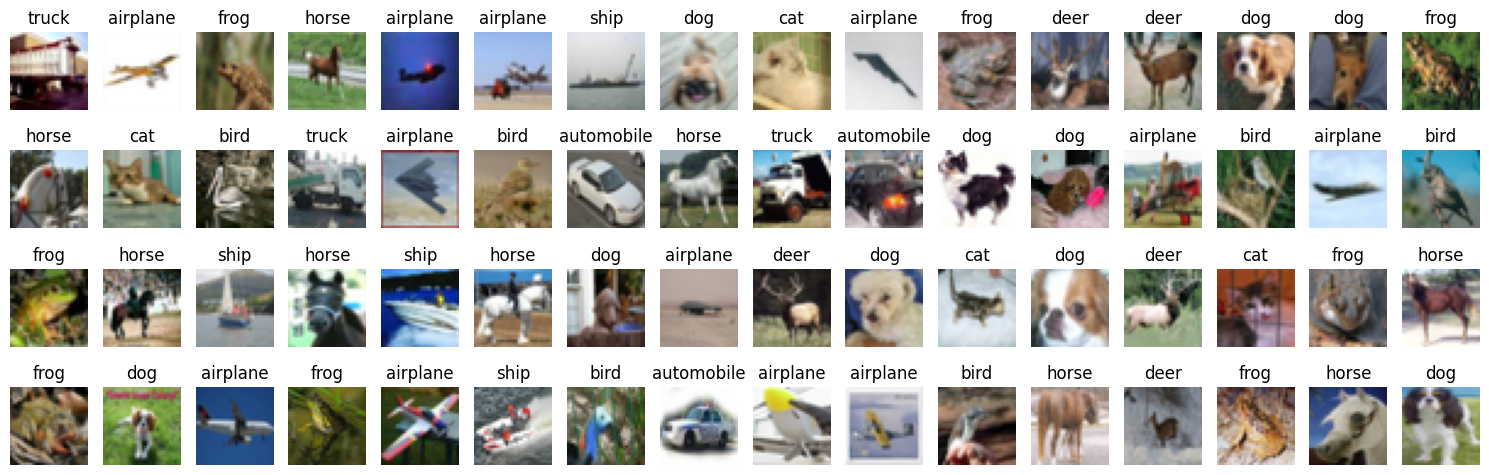

In [11]:
class_names= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig,axes=plt.subplots(4,16, figsize=(15,5))
axes=axes.ravel()

for i in range(64):
    idx=np.random.randint(0,len(x_train))
    axes[i].imshow(x_train[idx])

    label_index = np.argmax(y_train[idx])
    axes[i].set_title(class_names[label_index])
    axes[i].axis("off")


plt.tight_layout()
plt.show()



Mean & SD of pixel Density

In [12]:
mean=np.mean(x_train,axis=(0,1,2))
sd=np.std(x_train,axis=(0,1,2))
print(f"Mean: {mean}")
print(f"Stand. Dev: {sd}")

Mean: [0.49139968 0.48215841 0.44653091]
Stand. Dev: [0.24703223 0.24348513 0.26158784]


Check Missing val

In [13]:
import seaborn as sns
import pandas as pd

In [14]:
print(f"Missing in x_train: {np.isnan(x_train).sum()}")
print(f"Missing in y_train: {np.isnan(x_train).sum()}")
print(f"Missing in x_test: {np.isnan(x_test).sum()}")
print(f"Missing in y_test: {np.isnan(x_test).sum()}")

Missing in x_train: 0
Missing in y_train: 0
Missing in x_test: 0
Missing in y_test: 0


C:\Users\himan\AppData\Local\Temp\ipykernel_13576\3274914577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df_aug, palette="viridis")


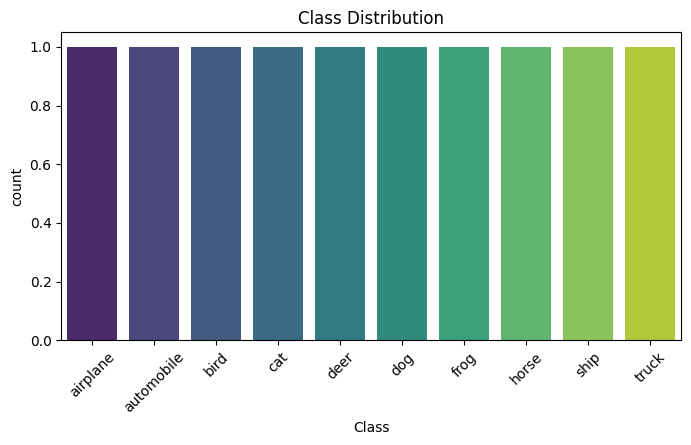

In [15]:
df_aug = pd.DataFrame({"Class":class_names})
plt.figure(figsize=(8, 4))
sns.countplot(x="Class", data=df_aug, palette="viridis")

plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Class Distribution")
plt.show()

Color Channel Analysis- RGB

In [16]:
r= x_train[:, :, :, 0].flatten()
g= x_train[:, :, :, 1].flatten()
b= x_train[:, :, :, 2].flatten()

# Histogram --Pixel Density

* Red: It has the lowest median pixel intensity.
* Green: It has the highest median pixel intensity.
* Blue: It's median is between red and green.

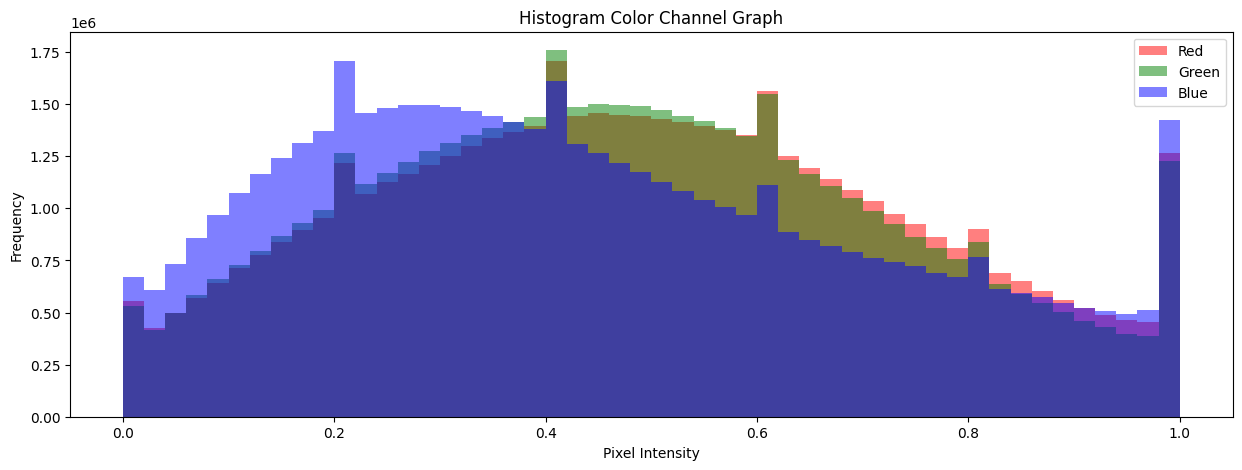

In [17]:
plt.figure(figsize=(15, 5))
plt.hist(r, bins=50, color="red", alpha=0.5, label="Red")
plt.hist(g, bins=50, color="green", alpha=0.5, label="Green")
plt.hist(b, bins=50, color="blue", alpha=0.5, label="Blue")

plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram Color Channel Graph")
plt.show()

BoxPlot --Pixel Density

C:\Users\himan\AppData\Local\Temp\ipykernel_13576\2989856362.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([r, g, b], labels=["Red", "Green", "Blue"], patch_artist=True)


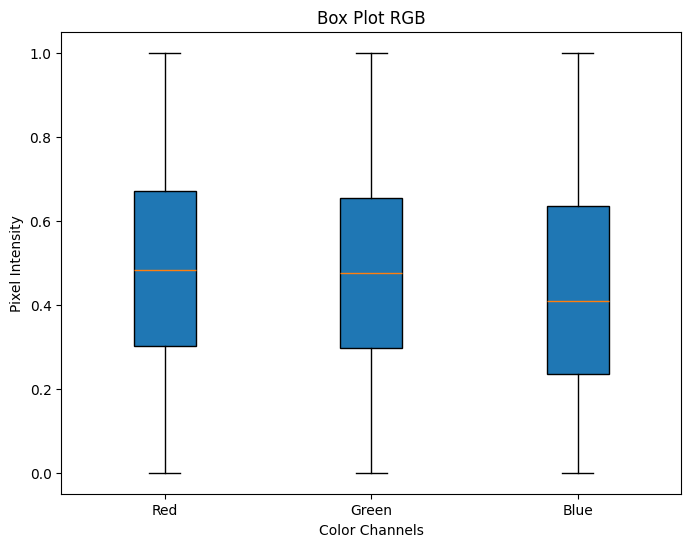

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot([r, g, b], labels=["Red", "Green", "Blue"], patch_artist=True)

plt.xlabel("Color Channels")
plt.ylabel("Pixel Intensity")
plt.title("Box Plot RGB")
plt.show()


# Model Preperation - CNN

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow as tf

* **Vanilla -- CNN, lr=0.001**

In [20]:
model_vanilla=Sequential([
    Conv2D(32,(3,3),activation="relu",padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.4),
    Dense(10,activation="softmax")
])


c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_vanilla.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
print("Current Learning Rate:", model_vanilla.optimizer.learning_rate.numpy())
model_vanilla.summary()

Current Learning Rate: 0.001

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

* **MobileNetV2 --CNN, lr=0.005**

In [23]:
model_mob=tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights=None)

In [24]:
model_mobnet=Sequential([
    model_mob,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.4),
    Dense(10, activation="softmax")
])

In [25]:
optimizer_005=tf.keras.optimizers.Adam(learning_rate=0.005)
model_mobnet.compile(optimizer=optimizer_005,loss="categorical_crossentropy",metrics=["accuracy"])

In [26]:
print("Current Learning Rate:", model_mobnet.optimizer.learning_rate.numpy())
model_mobnet.summary()

Current Learning Rate: 0.005


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_32             │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 2,306,506 (8.80 MB)

 Non-trainable params: 34,112 (133.25 KB)

* **DenseNet --CNN, lr=0.0001**

In [27]:
model_den=tf.keras.applications.DenseNet121(input_shape=(32,32,3), include_top=False,weights=None)

In [28]:
model_dennet=Sequential([
    model_den,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.4),
    Dense(10, activation="softmax")
])

In [29]:
optimizer_0001=tf.keras.optimizers.Adam(learning_rate=0.0001)
model_dennet.compile(optimizer=optimizer_0001,loss="categorical_crossentropy",metrics=["accuracy"])

In [30]:
print("Current Learning Rate:", model_dennet.optimizer.learning_rate.numpy())
model_dennet.summary()

Current Learning Rate: 1e-04


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1, 1, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,103,754 (27.10 MB)

 Trainable params: 7,020,106 (26.78 MB)

 Non-trainable params: 83,648 (326.75 KB)

* **ResNet --CNN, lr=0.0001**

In [31]:
model_res=tf.keras.applications.ResNet50(input_shape=(32,32,3), include_top=False,weights=None)
model_res.trainable=False

In [32]:
x=Flatten()(model_res.output)
x=Dense(64, activation="relu")(x)
x=Dropout(0.4)(x)
x=Dense(10, activation="softmax")(x)

model_resnet=tf.keras.Model(inputs=model_res.input, outputs=x)

In [33]:
optimizer_0001=tf.keras.optimizers.Adam(learning_rate=0.0001)
model_resnet.compile(optimizer=optimizer_0001,loss="categorical_crossentropy",metrics=["accuracy"])

In [34]:
print("Current Learning Rate:", model_resnet.optimizer.learning_rate.numpy())
model_resnet.summary()

Current Learning Rate: 1e-04


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,719,498 (90.48 MB)

 Trainable params: 131,786 (514.79 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Model Training  & W&B Visualization
* W&B Link- https://api.wandb.ai/links/raj-hr9934-vit-bhopal/wq6t8b51

**Data Augmentation**

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

Vanilla LR=0.001

In [37]:
class wandbCallback_ven(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    wandb.init(project="CIFAR10-ven",name="Vanilla")
    wandb.log({"Epoch":epoch+1,"Loss":logs.get("loss"),"Accuracy":logs.get("accuracy"),
               "val_loss":logs.get("val_loss"),"val_accuracy":logs.get("val_accuracy")})

In [38]:
history_vanilla=model_vanilla.fit(datagen.flow(x_train,y_train,batch_size=64),epochs=10, validation_data=(x_test,y_test),callbacks=[wandbCallback_ven()])

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 32:38 3s/step - accuracy: 0.0938 - loss: 2.31 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0877 - loss: 2.31 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.0915 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.0976 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.1046 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.1096 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.1123 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.1136 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.1144 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.1148 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.1152 - loss: 2.29 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.1159 - loss: 2.29 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.1165 - loss: 2.29 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.1171 - loss: 2.29 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accura

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.2345 - loss: 2.0408 - val_accuracy: 0.4503 - val_loss: 1.5461
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.3281 - loss: 1.74 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3134 - loss: 1.74 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3208 - loss: 1.72 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3283 - loss: 1.71 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3336 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3364 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3391 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3411 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.3437 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.3459 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.3478 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.3494 - loss: 1.70 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.3505 - lo

MobileNet LR=0.005

In [39]:
class wandbCallback_mob(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    wandb.init(project="CIFAR10-ven", name="MobileNet")
    wandb.log({"Epoch":epoch+1,"Loss":logs.get("loss"),"Accuracy":logs.get("accuracy"),
               "val_loss":logs.get("val_loss"),"val_accuracy":logs.get("val_accuracy")})

In [40]:
history_mobnet=model_mobnet.fit(datagen.flow(x_train,y_train,batch_size=64), epochs=10, validation_data=(x_test,y_test),callbacks=[wandbCallback_mob()])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7:35:48 35s/step - accuracy: 0.2031 - loss: 2.413 ━━━━━━━━━━━━━━━━━━━━ 1:37 125ms/step - accuracy: 0.1914 - loss: 2.717 ━━━━━━━━━━━━━━━━━━━━ 1:30 116ms/step - accuracy: 0.1780 - loss: 2.83 ━━━━━━━━━━━━━━━━━━━━ 1:26 112ms/step - accuracy: 0.1725 - loss: 2.88 ━━━━━━━━━━━━━━━━━━━━ 1:32 118ms/step - accuracy: 0.1668 - loss: 2.92 ━━━━━━━━━━━━━━━━━━━━ 1:28 115ms/step - accuracy: 0.1620 - loss: 2.93 ━━━━━━━━━━━━━━━━━━━━ 1:28 114ms/step - accuracy: 0.1580 - loss: 2.94 ━━━━━━━━━━━━━━━━━━━━ 1:26 112ms/step - accuracy: 0.1543 - loss: 2.93 ━━━━━━━━━━━━━━━━━━━━ 1:26 112ms/step - accuracy: 0.1513 - loss: 2.92 ━━━━━━━━━━━━━━━━━━━━ 1:25 111ms/step - accuracy: 0.1482 - loss: 2.91 ━━━━━━━━━━━━━━━━━━━━ 1:25 111ms/step - accuracy: 0.1453 - loss: 2.89 ━━━━━━━━━━━━━━━━━━━━ 1:25 111ms/step - accuracy: 0.1428 - loss: 2.88 ━━━━━━━━━━━━━━━━━━━━ 1:24 110ms/step - accuracy: 0.1409 - loss: 2.86 ━━━━━━━━━━━━━━━━━━━━ 1:24 110ms/step - accuracy: 0.1395 - loss: 2.85 ━━━━━━━━━━━━

DenseNet LR=0.0001

In [41]:
class wandbCallback_den(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    wandb.init(project="CIFAR10-ven", name="DenseNet")
    wandb.log({"Epoch":epoch+1,"Loss":logs.get("loss"),"Accuracy":logs.get("accuracy"),
               "val_loss":logs.get("val_loss"),"val_accuracy":logs.get("val_accuracy")})

In [42]:
history_dennet=model_dennet.fit(datagen.flow(x_train,y_train,batch_size=64),epochs=10,validation_data=(x_test,y_test),callbacks=[wandbCallback_den()])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14:57:05 69s/step - accuracy: 0.0469 - loss: 2.78 ━━━━━━━━━━━━━━━━━━━━ 5:29 422ms/step - accuracy: 0.0742 - loss: 2.7802 ━━━━━━━━━━━━━━━━━━━━ 4:23 338ms/step - accuracy: 0.0807 - loss: 2.76 ━━━━━━━━━━━━━━━━━━━━ 5:06 394ms/step - accuracy: 0.0820 - loss: 2.75 ━━━━━━━━━━━━━━━━━━━━ 4:43 364ms/step - accuracy: 0.0850 - loss: 2.74 ━━━━━━━━━━━━━━━━━━━━ 4:32 351ms/step - accuracy: 0.0873 - loss: 2.72 ━━━━━━━━━━━━━━━━━━━━ 4:22 339ms/step - accuracy: 0.0895 - loss: 2.71 ━━━━━━━━━━━━━━━━━━━━ 4:19 335ms/step - accuracy: 0.0918 - loss: 2.71 ━━━━━━━━━━━━━━━━━━━━ 4:20 337ms/step - accuracy: 0.0937 - loss: 2.70 ━━━━━━━━━━━━━━━━━━━━ 4:14 330ms/step - accuracy: 0.0951 - loss: 2.69 ━━━━━━━━━━━━━━━━━━━━ 4:18 335ms/step - accuracy: 0.0962 - loss: 2.69 ━━━━━━━━━━━━━━━━━━━━ 4:28 349ms/step - accuracy: 0.0969 - loss: 2.69 ━━━━━━━━━━━━━━━━━━━━ 4:34 357ms/step - accuracy: 0.0979 - loss: 2.69 ━━━━━━━━━━━━━━━━━━━━ 4:30 352ms/step - accuracy: 0.0986 - loss: 2.68 ━━━━━━━━━━━

ResNet LR=0.0001

In [62]:
tf.config.run_functions_eagerly(True)
print("Eager Execution:", tf.executing_eagerly())


Eager Execution: True


In [63]:
class wandbCallback_res(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    wandb.init(project="CIFAR10-ven",name="ResNet")
    wandb.log({"Epoch":epoch+1,"Loss":logs.get("loss"),"Accuracy":logs.get("accuracy"),
               "val_loss":logs.get("val_loss"),"val_accuracy":logs.get("val_accuracy")})

In [ ]:
history_resnet=model_resnet.fit(datagen.flow(x_train,y_train,batch_size=64),epochs=10,validation_data=(x_test,y_test),callbacks=[wandbCallback_res()])

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
266/782 ━━━━━━━━━━━━━━━━━━━━ 1:27:56 7s/step - accuracy: 0.1094 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 11:11 861ms/step - accuracy: 0.1094 - loss: 2.305 ━━━━━━━━━━━━━━━━━━━━ 10:50 835ms/step - accuracy: 0.1111 - loss: 2.304 ━━━━━━━━━━━━━━━━━━━━ 10:41 824ms/step - accuracy: 0.1087 - loss: 2.304 ━━━━━━━━━━━━━━━━━━━━ 10:34 817ms/step - accuracy: 0.1051 - loss: 2.304 ━━━━━━━━━━━━━━━━━━━━ 10:17 796ms/step - accuracy: 0.1041 - loss: 2.304 ━━━━━━━━━━━━━━━━━━━━ 10:08 785ms/step - accuracy: 0.1023 - loss: 2.304 ━━━━━━━━━━━━━━━━━━━━ 10:02 779ms/step - accuracy: 0.1010 - loss: 2.304 ━━━━━━━━━━━━━━━━━━━━ 9:56 771ms/step - accuracy: 0.1002 - loss: 2.303 ━━━━━━━━━━━━━━━━━━━━ 9:54 770ms/step - accuracy: 0.0992 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 9:48 764ms/step - accuracy: 0.0983 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 9:51 768ms/step - accuracy: 0.0984 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 9:51 770ms/step - accuracy: 0.0984 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 9:54 773ms/step - accuracy: 0.0982 - loss: 2.30 

# Model Evaluation

Vanilla Loss & Accuracy

In [43]:
test_loss, test_acc=model_vanilla.evaluate(x_test,y_test, verbose=0)

In [44]:
wandb.log({"Test Accuracy": test_acc})
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.6529


In [45]:
wandb.log({"Test Loss": test_loss})
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.9857


MobileNet Loss & Accuracy

In [46]:
test_loss, test_acc=model_mobnet.evaluate(x_test,y_test, verbose=0)

In [47]:
wandb.log({"Test Accuracy": test_acc})
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.1511


In [48]:
wandb.log({"Test Loss": test_loss})
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 38.5116


DenseNet Loss & Accuracy

In [49]:
test_loss, test_acc=model_dennet.evaluate(x_test,y_test,verbose=0)

In [50]:
wandb.log({"Test Accuracy": test_acc})
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.5149


In [51]:
wandb.log({"Test Loss": test_loss})
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 1.5674


ResNet Loss & Accuracy

Due to much training time, currently i have no data

In [52]:
test_loss, test_acc=model_resnet.evaluate(x_test,y_test,verbose=0)

In [53]:
wandb.log({"Test Accuracy": test_acc})
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.1066


In [54]:
wandb.log({"Test Loss": test_loss})
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 2.3020


# Graph Analysis of Result

In [55]:
learning_rate=[0.001,0.005,0.0001,0.0001]
optimizer=[tf.keras.optimizers.SGD, tf.keras.optimizers.Adam]

Vanilla

In [56]:
for lr in learning_rate:
    for opt in optimizer:
        experiment_name = f'Vanilla CNN - LR={lr} - Optimizer={opt.__name__}'
        model_vanilla, opt, lr, experiment_name

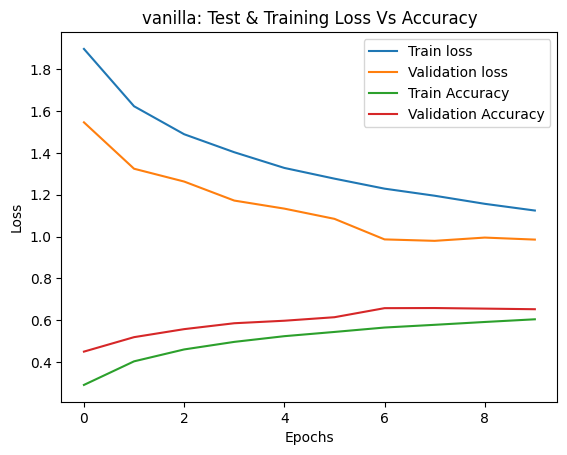

In [57]:
plt.plot(history_vanilla.history['loss'], label='Train loss')
plt.plot(history_vanilla.history['val_loss'], label='Validation loss')
plt.plot(history_vanilla.history['accuracy'], label='Train Accuracy')
plt.plot(history_vanilla.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("vanilla: Test & Training Loss Vs Accuracy")
plt.show()


Mobnet

In [58]:
for lr in learning_rate:
    for opt in optimizer:
        experiment_name = f'MobileNet CNN - LR={lr} - Optimizer={opt.__name__}'
        model_mobnet, opt, lr, experiment_name

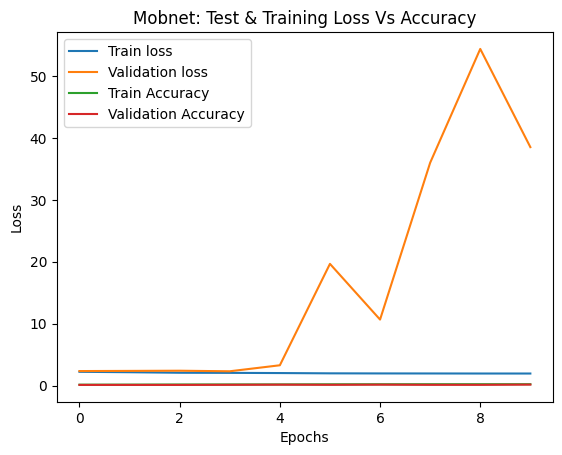

In [59]:
plt.plot(history_mobnet.history['loss'], label='Train loss')
plt.plot(history_mobnet.history['val_loss'], label='Validation loss')
plt.plot(history_mobnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobnet.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Mobnet: Test & Training Loss Vs Accuracy")
plt.show()

Densenet

In [60]:
for lr in learning_rate:
    for opt in optimizer:
        experiment_name = f'DenseNet CNN - LR={lr} - Optimizer={opt.__name__}'
        model_dennet, opt, lr, experiment_name

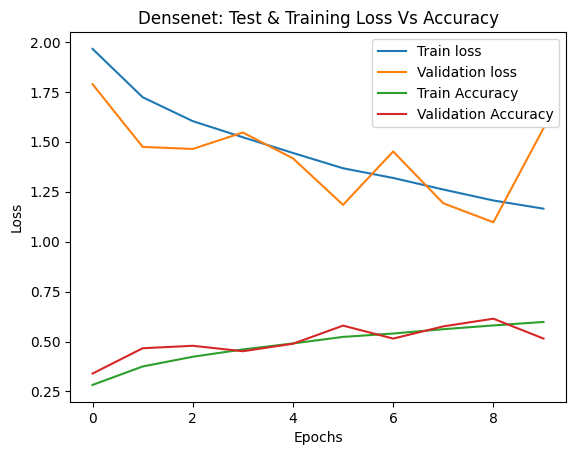

In [61]:
plt.plot(history_dennet.history['loss'], label='Train loss')
plt.plot(history_dennet.history['val_loss'], label='Validation loss')
plt.plot(history_dennet.history['accuracy'], label='Train Accuracy')
plt.plot(history_dennet.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Densenet: Test & Training Loss Vs Accuracy")
plt.show()

ResNet

In [ ]:
for lr in learning_rate:
    for opt in optimizer:
        experiment_name = f'ResNet CNN - LR={lr} - Optimizer={opt.__name__}'
        model_dennet, opt, lr, experiment_name

In [ ]:
plt.plot(history_resnet.history['loss'], label='Train loss')
plt.plot(history_resnet.history['val_loss'], label='Validation loss')
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Densenet: Test & Training Loss Vs Accuracy")
plt.show()

# Accuracy Card

In [ ]:
result=pd.DataFrame({
    'Model': ['Vanilla CNN','MobileNet','DenseNet','ResNet'],
    'Accuracy': [0.6857,0.1010,0.6191,0.0]
    })
result_short = result.sort_values(by='Accuracy', ascending=False)
result_short = result_short.set_index('Accuracy')
result_short

,Model
Accuracy,
0.6857,Vanilla CNN
0.6191,DenseNet
0.1010,MobileNet
0.0000,ResNet


# Model Prediction

In [ ]:
y_pred=model_dennet.predict(x_test)
y_model=y_pred.argmax(axis=1)
print("accuracy_score:",accuracy_score(y_model,Y_test))

In [ ]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

image_number = 64
plt.imshow(x_test[image_number])

n = np.array(x_test[image_number])
p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model_resnet.predict(p).argmax()]
original_label = labels[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

# Model Deployment

In [ ]:
model_dennet.save("cifar_tata.h5")